**DBSCAN algo**


In this algorithm, we have 3 types of data points.
- Core Point: A point is a core point if it has more than MinPts points within eps, including itself. 
- Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point, including itself. 
- Noise or outlier: A point which is not a core point or border point.

**Other components/terms**


- $\epsilon$ (epsilon): the radius of a neighborhood centered on a given point
- Directly Density Reachable: a given point is Directly Density Reachable ($\epsilon$ Reachable) from another point if the second point is a core point, and the first point lies within the $\epsilon$ neighborhood of the second point
- Density Reachable: a given point is Density Reachable from another point if there is a chain of points, Directly Density Reachable from each other, that connects them
- Density Connected: A given point is Density Connected from another point if there is a third point from which both are Density Reachable — These points are said to be Connected Components

**Steps**

Given a set of points P, the radius of a neighborhood ε, and a minimum number of points minPts:
1. Find all points within the ε neighborhood of each point;
2. Identify Core Points with at least minPts neighbors;
3. Find all Connected Components of each core point — This Density Connected grouping of points is a cluster
4. Each Border Point is assigned to a cluster if that cluster is Density Reachable, otherwise, Border Point is considered Noise
Any given point may initially be considered noise and later revised to belong to a cluster, but once assigned to a cluster a point will never be assigned.

**Pseudo code**
```
DBSCAN(dataset, eps, MinPts) {
# cluster index
C = 1
for each unvisited point p in dataset {
         mark p as visited
         # find neighbors
         Neighbors N = find the neighboring points of p

         if |N|>=MinPts:
             N = N U N'
             if p' is not a member of any cluster:
                 add p' to cluster C 
}
```

steps to be implemented:
1. start with an arbitary point that has not been visited 
   1. get neighbors in eps range
      1. if eps distance has minPts number of neighbors in it
         - new cluster created 
         - point marked as core point 
      2. if eps distance has less than minPts number of neighbors
         - point marked as noise (temporarily)
2. for all subsequent points 
   1. check if point is density reachable (direct density reachable or density reachable)
      - if yes, part of the same cluster as the reachable core point 
      - if not, new cluster based on conditions in 1.1 
3. for all points marked as noise, check if density reachable 
   - if yes, mark as that cluster label 
   - else, remains noise 
4. terminate when all points visited 

In [1]:
import math
import numpy as np
from collections import deque


def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))


def get_neighbors(data, point_idx, eps):
    neighbors = []
    for idx, current_point in enumerate(data):
        if euclidean_distance(data[point_idx], current_point) < eps:
            neighbors.append(idx)
    return neighbors


# Core function for DBSCAN
def dbscan(data, eps, min_samples):
    labels = [0] * len(data)  # 0 denotes an undefined label
    cluster_id = 0  # Start with cluster_id as 1, as 0 is used for undefined

    for point_idx in range(len(data)):
        if labels[point_idx] != 0:  # Ignore already processed points
            continue

        neighbors = get_neighbors(data, point_idx, eps)

        # If the point is not a core point, mark as noise (temporarily)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        else:
            # Increment the cluster ID, because this is the start of a new cluster
            cluster_id += 1
            # Start expanding cluster from the core point
            grow_cluster(
                data, labels, point_idx, neighbors, cluster_id, eps, min_samples
            )

    return labels


# # Function to expand clusters from a core point
# def grow_cluster(data, labels, point_idx, neighbors, cluster_id, eps, min_samples):
#     # Label initial point as a core point of the cluster
#     labels[point_idx] = cluster_id
#     i = 0
#     while i < len(neighbors):  # Process every point in the neighborhood, including newly found
#         neighbor_idx = neighbors[i]
#         if labels[neighbor_idx] == -1:  # Previously labeled as noise
#             labels[neighbor_idx] = cluster_id  # Noise becomes edge point
#         elif labels[neighbor_idx] == 0:  # Not yet visited
#             labels[neighbor_idx] = cluster_id  # Label as part of the cluster
#             neighbor_neighbors = get_neighbors(data, neighbor_idx, eps)
#             # If neighbor is a core point, append its neighbors to the list for further checking
#             if len(neighbor_neighbors) >= min_samples:
#                 neighbors += neighbor_neighbors
#         i += 1  # Go to the next neighbor


def grow_cluster(data, labels, point_idx, neighbors, cluster_id, eps, min_samples):
    # Label initial point as a core point of the cluster
    labels[point_idx] = cluster_id
    neighbors = deque(
        neighbors
    )  # Convert list to a deque for efficient popleft operation
    while neighbors:
        neighbor_idx = neighbors.popleft()
        if labels[neighbor_idx] == -1:  # Previously labeled as noise
            labels[neighbor_idx] = cluster_id  # Noise becomes edge point
        elif labels[neighbor_idx] == 0:  # Not yet visited
            labels[neighbor_idx] = cluster_id  # Label as part of the cluster
            neighbor_neighbors = get_neighbors(data, neighbor_idx, eps)
            # If neighbor is a core point, append its neighbors to the queue for further checking
            if len(neighbor_neighbors) >= min_samples:
                for n_neighbor_idx in neighbor_neighbors:
                    if labels[n_neighbor_idx] <= 0:  # Not yet visited or noise
                        neighbors.append(n_neighbor_idx)

In [3]:
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1],[2,-1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

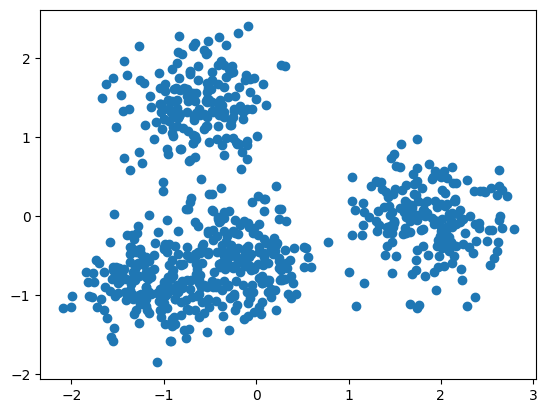

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1])

In [5]:
# Tune these parameters for your dataset
eps = 0.25
min_samples = 5

clusters = dbscan(X, eps, min_samples)
print("Cluster labels:", clusters)

Cluster labels: [1, 2, 1, 3, 1, 3, 3, 3, 1, 1, 2, 3, 2, 3, 2, 1, -1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 2, 2, 1, 2, 1, 3, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 2, 3, 2, -1, 2, 1, 3, 2, 2, 2, 1, 1, 1, 2, 3, 2, 3, 3, 1, 3, 1, 3, -1, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, -1, 3, 3, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, -1, 3, 1, 3, 1, 2, 1, 3, 3, -1, 2, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 3, 3, 1, 2, 3, 2, 3, 3, 3, -1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 3, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, -1, 1, 3, 2, 1, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 1, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 

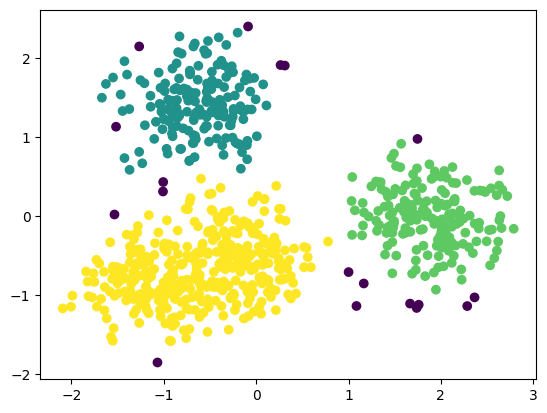

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=np.array(clusters))

In [7]:
np.unique(np.array(clusters))

array([-1,  1,  2,  3])

In [111]:
# # calculate cluster centroids

# def calculate_centroids(points, cluster_labels):
#     if -1 in np.unique(cluster_labels):
#         unique_cluster_labels = np.unique(cluster_labels)[1:]
#     else: 
#         unique_cluster_labels = np.unique(cluster_labels)

#     centroids = []

#     for l in unique_cluster_labels:
#         f = []
#         for i in range(np.array(points).shape[1]):
#             f.append(np.mean(points[np.where(np.array(cluster_labels) == l)[0]][:,i]))
#         centroids.append(f)
#     return centroids

# # for a new point (aka label)

# ## calculate distance from centroids and return top c choices
# def get_top_c(point, centroids, c):
#     distance_dict = {}
#     for i in range(len(centroids)):
#         distance_dict[i] = euclidean_distance(point1=point, point2=centroids[i])
#     top_c_cluster_ids = list(dict(sorted(distance_dict.items(), key=lambda item: item[1])).keys())[:c]
#     return top_c_cluster_ids, dict(sorted(distance_dict.items(), key=lambda item: item[1]))


# X_centroids = calculate_centroids(points=X, cluster_labels=clusters)
# get_top_c(point=[0,0], centroids=X_centroids, c=1)

In [11]:
def min_max_distance(data, label, clusters_labels):
    min_max = {}
    for l in np.unique(clusters_labels):    
        min_dist = np.inf
        # max_dist = -np.inf
        for d in data[np.where(np.array(clusters_labels)==l)[0]]:
            dist = euclidean_distance(point1=d, point2=label)
            if dist < min_dist: 
                min_dist = dist
            # if dist > max_dist:
            #     max_dist = dist
        # min_max.append([min_dist, max_dist])
        # min_max.append(min_dist/max_dist)
        min_max[l] = min_dist
    return dict(sorted(min_max.items(), key=lambda x: x[1]))

def get_top_c(data, label, clusters_labels, c):
    min_dist_dict = min_max_distance(data=data, label=label, clusters_labels=clusters_labels)
    min_dist_dict.pop(-1)
    return list(min_dist_dict.keys())[:c]

In [20]:
get_top_c(data=X, label=[2,-1], clusters_labels=clusters, c=2)
# min_max_distance(data=X, label=[-1,0], clusters_labels=clusters)

[3, 1]

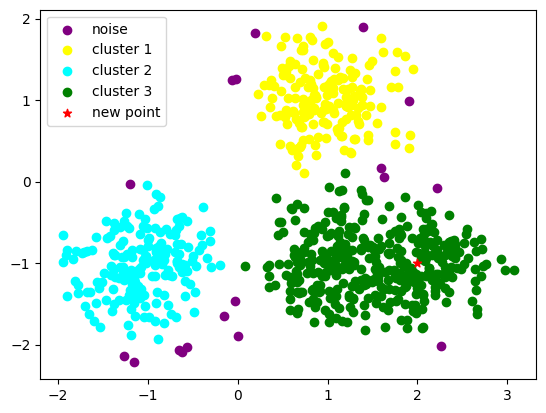

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X = pca.fit_transform(X)
plt.scatter(X[np.where(np.array(clusters)==-1)[0], 0], X[np.where(np.array(clusters)==-1)[0], 1], c='purple')
plt.scatter(X[np.where(np.array(clusters)==1)[0], 0], X[np.where(np.array(clusters)==1)[0], 1], c='yellow')
plt.scatter(X[np.where(np.array(clusters)==2)[0], 0], X[np.where(np.array(clusters)==2)[0], 1], c='cyan')
plt.scatter(X[np.where(np.array(clusters)==3)[0], 0], X[np.where(np.array(clusters)==3)[0], 1], c='green')
# plt.scatter(X_centroids[0,0],X_centroids[0,1], c='blue', marker='*')
# plt.scatter(X_centroids[1,0],X_centroids[1,1], c='blue', marker='*')
# plt.scatter(X_centroids[2,0],X_centroids[2,1], c='blue', marker='*')
plt.scatter(2,-1, c='red', marker='*')
plt.legend(['noise', 'cluster 1', 'cluster 2', 'cluster 3', 'new point'])

/var/folders/y5/xvm7054j4cv_7krh38r1lz2r0000gn/T/ipykernel_53421/2140612487.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail((40, 40), Image.ANTIALIAS)


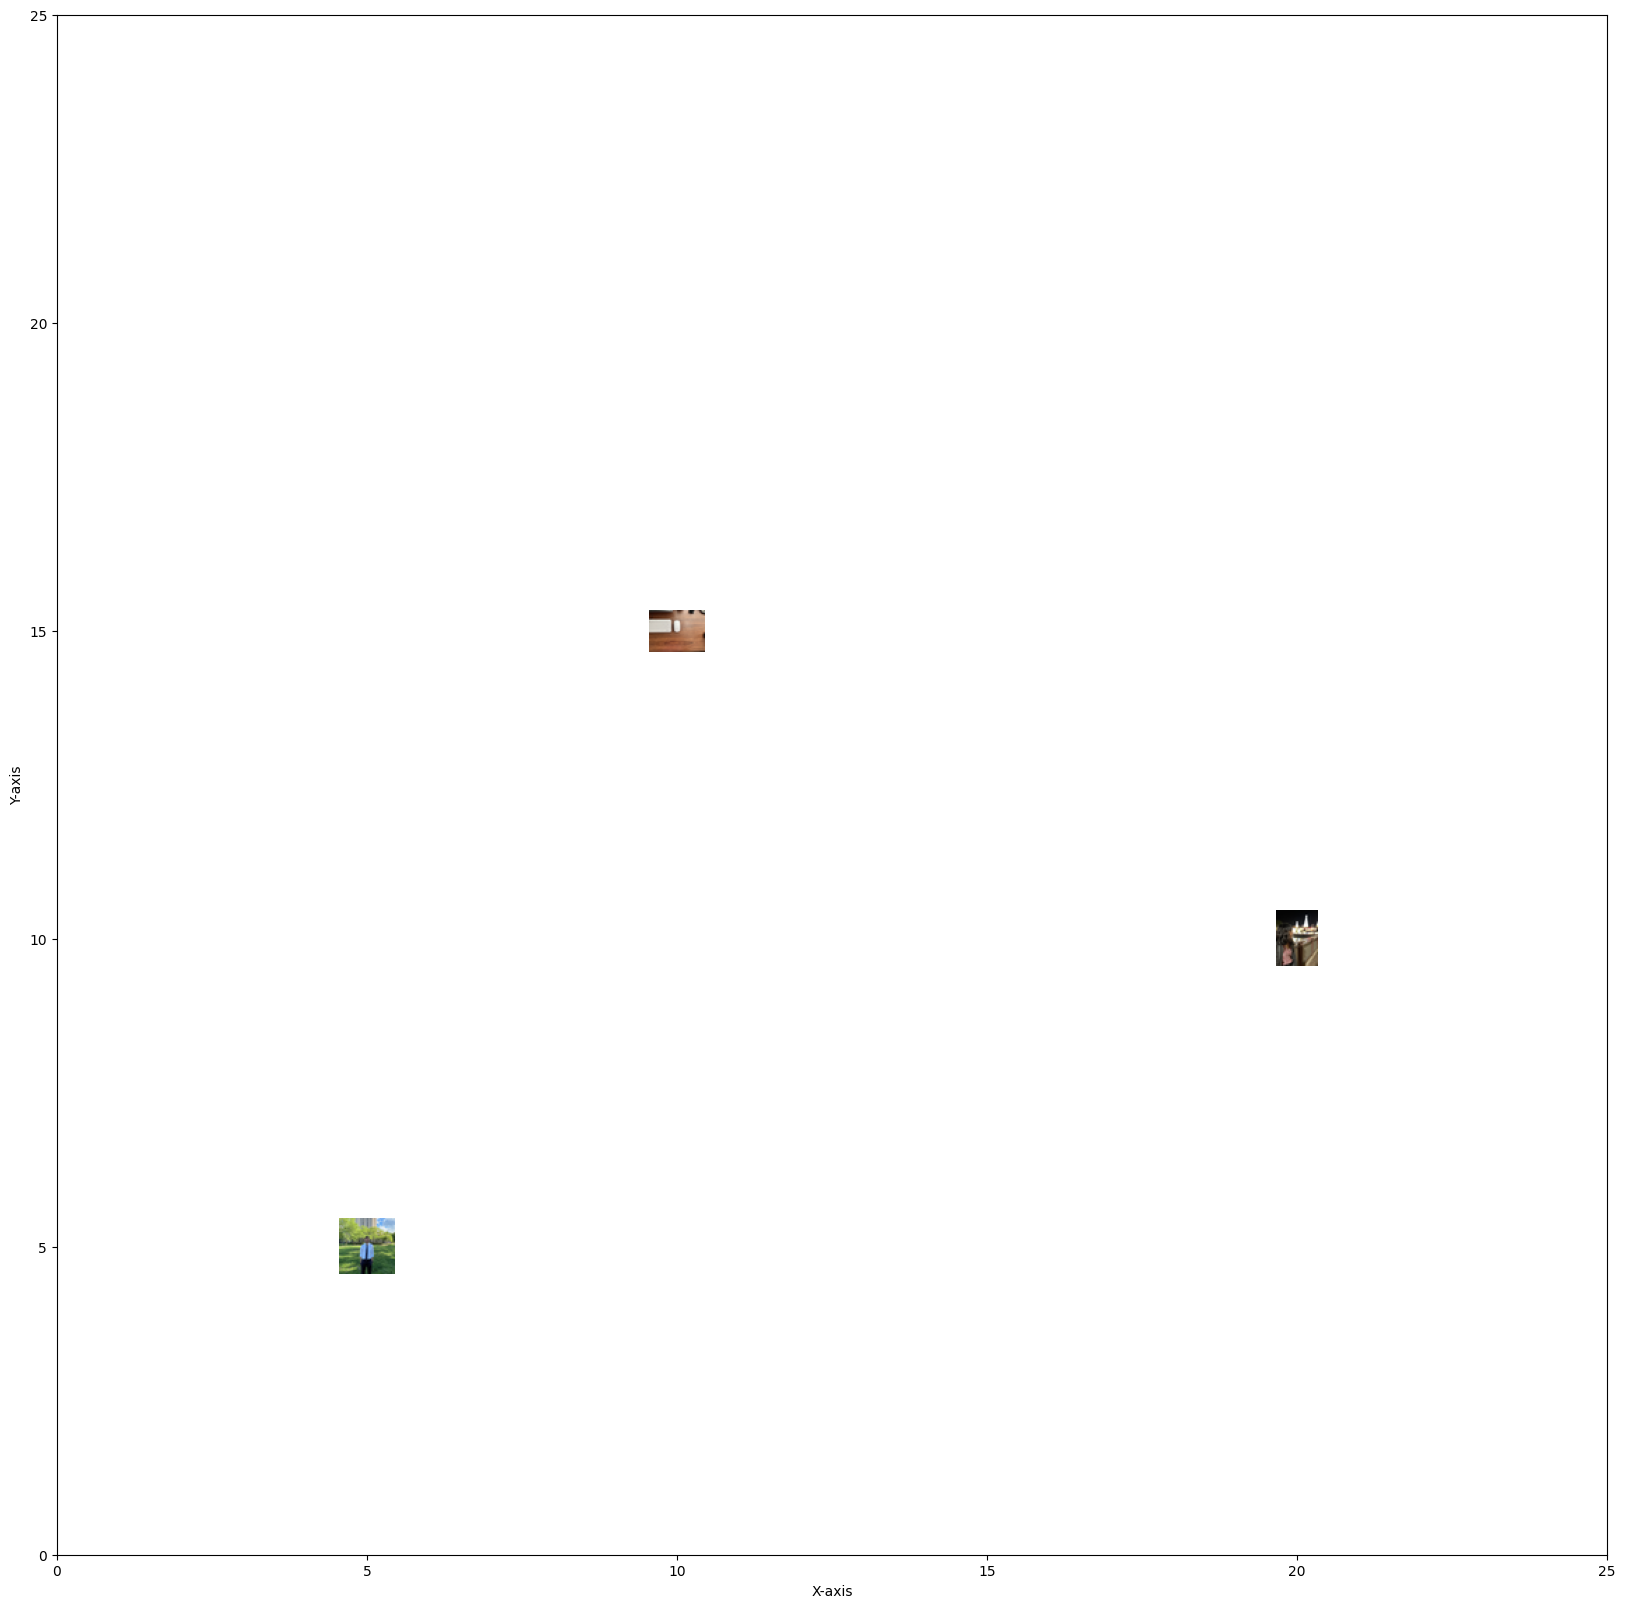

In [150]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np


# Define the image paths and the positions where they will be shown
image_paths = ['img1.jpeg', 'img2.jpg', 'img3.jpg']
positions = [(5, 5), (10, 15), (20, 10)]  # Example positions; change as required

# Set up the figure and axis for the plot
# plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(20,20))

# Loop through the images, resize them, and plot them as points in the scatter plot
for path, (x, y) in zip(image_paths, positions):
    img = Image.open(path)
    
    # Resize the image to thumbnail size
    img.thumbnail((40, 40), Image.ANTIALIAS)
    
    # Convert image to numpy array
    im_array = np.asarray(img)
    
    # Create an annotation box (a BboxImage)
    imagebox = OffsetImage(im_array, zoom=1)
    imagebox.image.axes = ax
    
    # Create an AnnotationBbox for each image and add it to the plot
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, boxcoords="data")
    ax.add_artist(ab)

# Set limits and labels as needed
ax.set_xlim(0, 25)
ax.set_ylim(0, 25)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()